# Forecasting_Model_based_method

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
ps = pd.read_excel("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\Airlines.xlsx")
ps

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

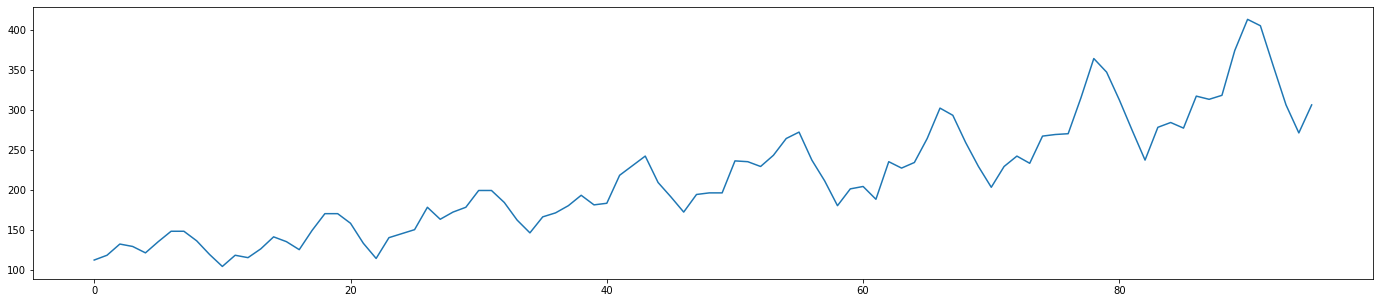

In [45]:
plt.figure(figsize=(24,5))
ps.Passengers.plot()

In [46]:
ps["Date"] = pd.to_datetime(ps.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

ps["month"] = ps.Date.dt.strftime("%b") # month extraction
ps["year"] = ps.Date.dt.strftime("%y") # year extraction

#ps["Day"] = ps.Date.dt.strftime("%d") # Day extraction
#ps["wkday"] = ps.Date.dt.strftime("%A") # weekday extraction


In [47]:
ps

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


<AxesSubplot:xlabel='month', ylabel='year'>

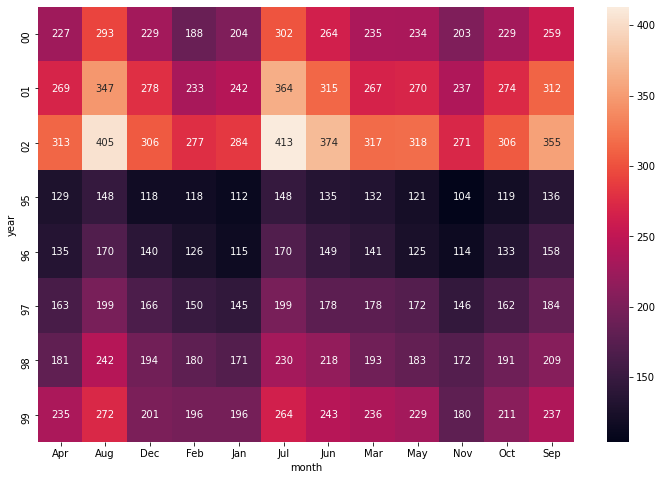

In [48]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=ps,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

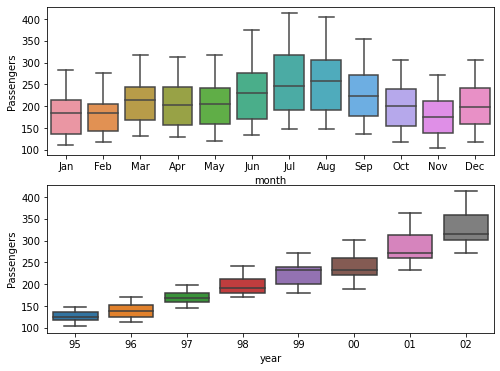

In [49]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=ps)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=ps)


<AxesSubplot:>

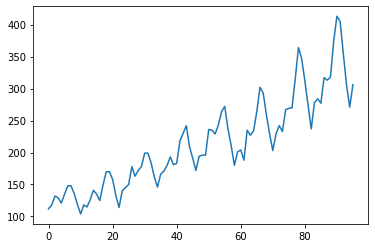

In [50]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
p = ps["month"][0]
p[0:3]
ps['Month']= 0

for i in range(96):
    p = ps["month"][i]
    ps['month'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(ps['month']))
ps1 = pd.concat([ps.Passengers,month_dummies],axis = 1)

ps1["t"] = np.arange(1,97)

ps1["t_square"] = ps1["t"]*ps1["t"]
ps1.columns
ps1["log_Passengers"] = np.log(ps1["Passengers"])
ps1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
ps1.Passengers.plot()


In [51]:
ps1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

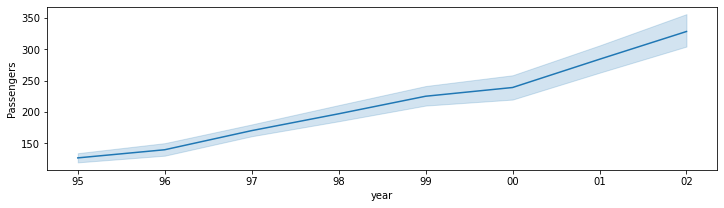

In [52]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=ps)

In [53]:
#Splitting data

Train = ps1.head(72)
Test = ps1.iloc[72:84,:]
predict_data = ps1.tail(12)

In [54]:
ps2= ps1.iloc[0:84,:]

In [55]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206


In [56]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128


In [57]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [58]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


42.786560820931676

In [59]:

#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


38.78176181392996

In [60]:

#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad


42.94925714948836

In [61]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea


103.11431762854282

In [63]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


25.48137503176084

In [65]:

##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134973

In [66]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.820420950122466

In [67]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.820421
4,rmse_add_sea_quad,25.481375
1,rmse_Exp,38.781762
0,rmse_linear,42.786561
2,rmse_Quad,42.949257
3,rmse_add_sea,103.114318
5,rmse_Mult_sea,108.103791


In [68]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [69]:

#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=ps2).fit()

In [70]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new


84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [71]:
predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)


In [72]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.637978
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.662487
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.808210
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.765280
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.753323
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.865720
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.966763
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.975173
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.867869
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.740788


# Forecasting_Model_Arima

In [20]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [22]:
series = pd.read_excel("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\Airlines.xlsx",header=0, index_col=0, parse_dates=True)

In [23]:
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


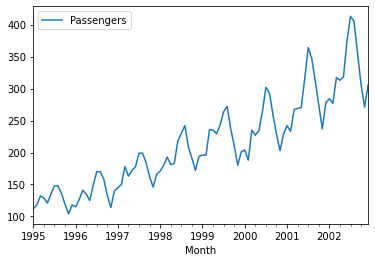

In [24]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

In [25]:

# separate out a validation dataset
dataset = series.head(84)
validation = series.tail(12)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [26]:
#Persistence/ Base model
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [27]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [29]:
#########ARIMA Hyperparameters

# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
#def evaluate_arima_model(X, arima_order):
# prepare training dataset
#    X = X.astype('float32')
 #   train_size = int(len(X) * 0.50)
  #  train, test = X[0:train_size], X[train_size:]
   # history = [x for x in train]
# make predictions
    #predictions = list()
    #for t in range(len(test)):
     #   model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
      #  model_fit = model.fit(disp=0)
       # yhat = model_fit.forecast()[0]
        #predictions.append(yhat)
       # history.append(test[t])
# calculate out of sample error
   # rmse = sqrt(mean_squared_error(test, predictions))
    #return rmse

In [30]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(5,1,5)).fit(disp=0)
pred=model.forecast(steps=35)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima


E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessi

26.029287422266048

In [31]:
#Grid search for p,d,q values

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [32]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(1, 5)
q_values = range(1, 15)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [33]:
#Build Model based on the optimized values¶

# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy


In [34]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')


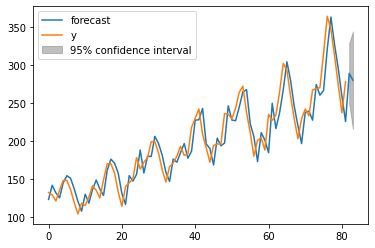

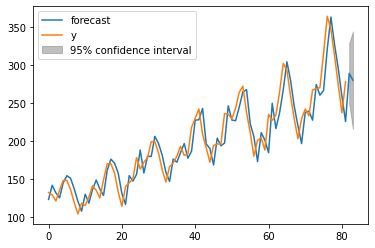

In [36]:
# fit model
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1, 84)

In [37]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse


92.98597219601416

In [38]:
#Combine train and test data and build final model

# fit model
data = pd.read_excel("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\Airlines.xlsx",header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [39]:
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()

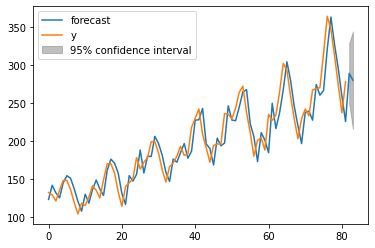

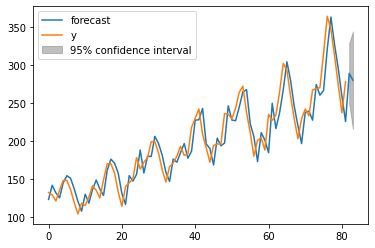

In [40]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,84)

In [41]:
pd.DataFrame(forecast)


,0
0,288.833998
1,279.864632
2,271.795815
3,264.537129
4,258.007234
5,252.132958
6,246.848475
7,242.094569
8,237.817967
9,233.970747


# Forecasting_Data_Driven_Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
a = pd.read_excel("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\Airlines.xlsx")
a

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

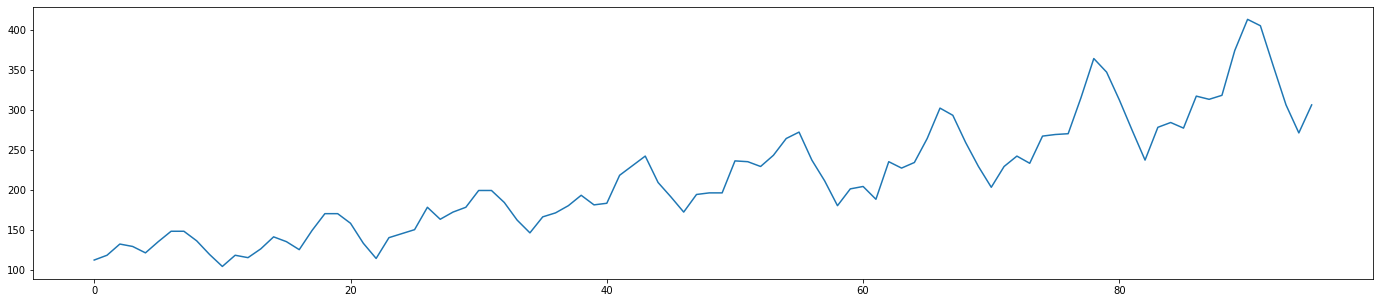

In [3]:
plt.figure(figsize=(24,5))
a.Passengers.plot()


# Splitting data

In [4]:
Train = a.head(84)
Test = a.tail(12)


In [5]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [6]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


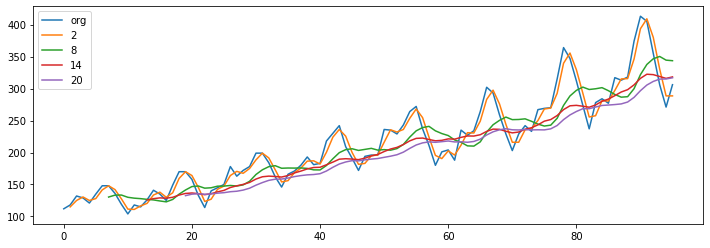

In [8]:
# Moving Average
plt.figure(figsize=(12,4))
a.Passengers.plot(label="org")
for i in range(2,24,6):
    a["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<ipython-input-10-d8f831cf3ff6>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(a.Passengers,freq=12)


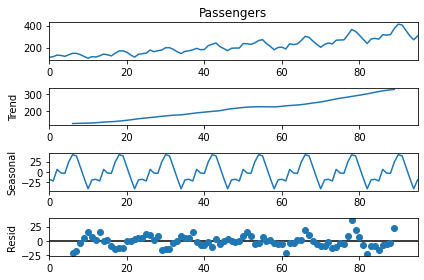

In [10]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(a.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

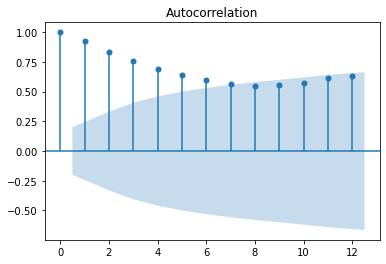

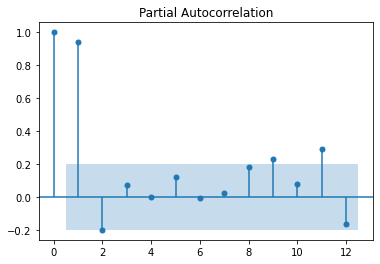

In [11]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(a.Passengers,lags=12)
tsa_plots.plot_pacf(a.Passengers,lags=12)
plt.show()


In [12]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [13]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train.Passengers).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

In [14]:
# Holt method 
hw_model = Holt(Train.Passengers).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-14-18d4b5b3e785>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train.Passengers).fit(smoothing_level=0.5, smoothing_slope=0.2)


23.494677034614366

In [15]:
#Holts winter exponential smoothing with additive seasonality and additive trend¶

hwe_model_add_add = ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

5.500223404459323

In [16]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend¶

hwe_model_mul_add = ExponentialSmoothing(Train.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)


2.821078114635888

In [18]:
#Final Model by combining train and test

hwe_model_add_add = ExponentialSmoothing(a.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()


In [19]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)


96     319.235311
97     311.528443
98     350.278769
99     346.985083
100    351.845149
101    403.925822
102    440.566900
103    427.446553
104    376.628245
105    329.767599
dtype: float64